# Sensitivity analysis of spatial weights

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pickle
import json
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats
from pysal.explore import esda
from pysal.lib import weights
from splot.esda import lisa_cluster

from src import plotting_functions as plot_func
from src import evaluation_functions as eval_func

%run ../settings/yaml_variables.py
%run ../settings/df_styler.py
%run ../settings/plotting.py
%run ../settings/paths.py
%run ../settings/load_osmdata.py
%run ../settings/load_refdata.py

/opt/miniconda3/envs/bikedna_analysis/lib/python3.11/site-packages/pysal/explore/segregation/network/network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
/opt/miniconda3/envs/bikedna_analysis/lib/python3.11/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql
<string>:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
/Users/anev/Library/CloudStorage/Dropbox/ITU/repositories/bikedna_dk_analysis/settings/plotting.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases 

OSM data loaded successfully!
Reference data loaded successfully!


## Spatial patterns in density differences

In [2]:
# Read extrinsic grid results
with open(
    compare_results_data_fp + f"grid_results_extrinsic.pickle", "rb"
) as fp:
    extrinsic_grid = pickle.load(fp)

In [34]:
col_names = ['edge_density_diff']
variable_names = ["edge_density"]
filepaths = [compare_analysis_plots_fp+"morans_edge_dens_test.png"]

ex_grid_subset = extrinsic_grid.loc[(~extrinsic_grid.count_osm_edges.isna()) | (~extrinsic_grid.count_ref_edges.isna())].copy()

w_k6 = eval_func.compute_spatial_weights(ex_grid_subset, "hex_id_osm", "knn", k=6) # using filler col for subset
w_k10 = eval_func.compute_spatial_weights(ex_grid_subset, "hex_id_osm", "knn", k=10) # using filler col for subset
w_k20 = eval_func.compute_spatial_weights(ex_grid_subset, "hex_id_osm", "knn", k=20) # using filler col for subset
dist_1000 = eval_func.compute_spatial_weights(ex_grid_subset, "hex_id_osm", "dist", dist=1000) # using filler col for subset
dist_2000 = eval_func.compute_spatial_weights(ex_grid_subset, "hex_id_osm", "dist", dist=2000) # using filler col for subset


all_weigths = {
    "k6": w_k6,
    "k10": w_k10,
    "k20": w_k20,
    "dist1000": dist_1000,
    "dist2000": dist_2000
}

/opt/miniconda3/envs/bikedna_analysis/lib/python3.11/site-packages/pysal/lib/weights/weights.py:170: UserWarning: The weights matrix is not fully connected. There are 23 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)
/opt/miniconda3/envs/bikedna_analysis/lib/python3.11/site-packages/pysal/lib/weights/weights.py:170: UserWarning: The weights matrix is not fully connected. There are 7 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)


/opt/miniconda3/envs/bikedna_analysis/lib/python3.11/site-packages/pysal/lib/weights/weights.py:170: UserWarning: The weights matrix is not fully connected. There are 4 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)
/opt/miniconda3/envs/bikedna_analysis/lib/python3.11/site-packages/pysal/lib/weights/weights.py:167: UserWarning: There are 132 disconnected observations 
  Island ids: 123, 496, 533, 633, 639, 704, 960, 966, 1025, 1140, 1166, 1183, 1246, 1365, 1816, 1929, 1933, 1946, 1965, 2168, 2257, 2396, 2417, 2483, 2616, 2896, 3046, 3121, 3197, 3471, 3525, 3648, 3792, 4064, 4083, 4354, 4445, 4686, 4925, 5026, 5060, 5264, 5265, 5843, 5959, 5976, 6029, 6218, 6228, 6253, 6306, 6365, 6388, 6440, 6456, 6594, 6724, 6796, 6923, 7154, 7428, 7460, 7690, 7728, 7815, 7863, 7997, 8207, 8240, 8392, 8789, 8905, 9055, 9279, 9442, 9584, 9618, 9862, 9956, 10077, 10115, 10212, 10259, 10279, 10403, 10487, 10756, 10811, 10816, 10845, 10

no valid type defined
('WARNING: ', 123, ' is an island (no neighbors)')
('WARNING: ', 496, ' is an island (no neighbors)')
('WARNING: ', 533, ' is an island (no neighbors)')
('WARNING: ', 633, ' is an island (no neighbors)')
('WARNING: ', 639, ' is an island (no neighbors)')
('WARNING: ', 704, ' is an island (no neighbors)')
('WARNING: ', 960, ' is an island (no neighbors)')
('WARNING: ', 966, ' is an island (no neighbors)')
('WARNING: ', 1025, ' is an island (no neighbors)')
('WARNING: ', 1140, ' is an island (no neighbors)')
('WARNING: ', 1166, ' is an island (no neighbors)')
('WARNING: ', 1183, ' is an island (no neighbors)')
('WARNING: ', 1246, ' is an island (no neighbors)')
('WARNING: ', 1365, ' is an island (no neighbors)')
('WARNING: ', 1816, ' is an island (no neighbors)')
('WARNING: ', 1929, ' is an island (no neighbors)')
('WARNING: ', 1933, ' is an island (no neighbors)')
('WARNING: ', 1946, ' is an island (no neighbors)')
('WARNING: ', 1965, ' is an island (no neighbors)'

/opt/miniconda3/envs/bikedna_analysis/lib/python3.11/site-packages/pysal/lib/weights/weights.py:167: UserWarning: There are 78 disconnected observations 
  Island ids: 123, 496, 533, 633, 639, 704, 960, 966, 1025, 1140, 1166, 1365, 1929, 1946, 1965, 2417, 2616, 2896, 3046, 3121, 3197, 3648, 4083, 4354, 4445, 4925, 5026, 5264, 5843, 5959, 6218, 6228, 6253, 6306, 6388, 6440, 6456, 6724, 6796, 7154, 7460, 7728, 7815, 8207, 8240, 8392, 8789, 8905, 9279, 9442, 9584, 9618, 10115, 10279, 10403, 10816, 11106, 11156, 11267, 11299, 11517, 12305, 12342, 12447, 12476, 12495, 12654, 12885, 13030, 13094, 13464, 13653, 13762, 13801, 14363, 14627, 14885, 15223
  warnings.warn("There are %d disconnected observations" % ni + ' \n '


no valid type defined
('WARNING: ', 123, ' is an island (no neighbors)')
('WARNING: ', 496, ' is an island (no neighbors)')
('WARNING: ', 533, ' is an island (no neighbors)')
('WARNING: ', 633, ' is an island (no neighbors)')
('WARNING: ', 639, ' is an island (no neighbors)')
('WARNING: ', 704, ' is an island (no neighbors)')
('WARNING: ', 960, ' is an island (no neighbors)')
('WARNING: ', 966, ' is an island (no neighbors)')
('WARNING: ', 1025, ' is an island (no neighbors)')
('WARNING: ', 1140, ' is an island (no neighbors)')
('WARNING: ', 1166, ' is an island (no neighbors)')
('WARNING: ', 1365, ' is an island (no neighbors)')
('WARNING: ', 1929, ' is an island (no neighbors)')
('WARNING: ', 1946, ' is an island (no neighbors)')
('WARNING: ', 1965, ' is an island (no neighbors)')
('WARNING: ', 2417, ' is an island (no neighbors)')
('WARNING: ', 2616, ' is an island (no neighbors)')
('WARNING: ', 2896, ' is an island (no neighbors)')
('WARNING: ', 3046, ' is an island (no neighbors)'

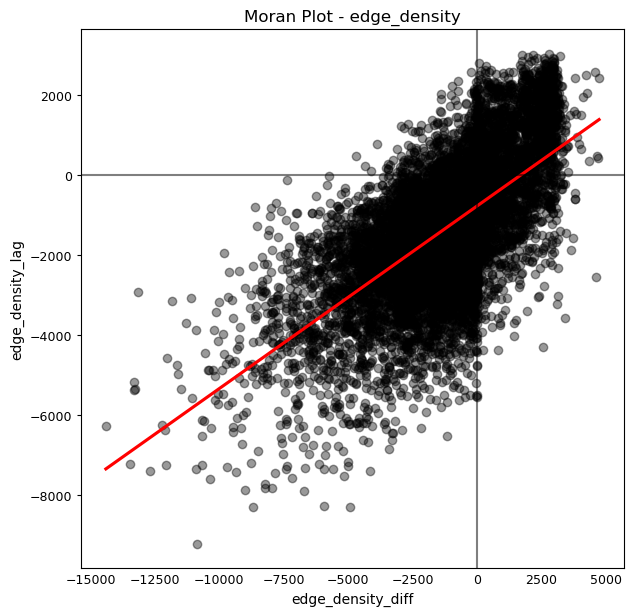

With significance 0.001, the Moran's I value for edge_density is 0.46


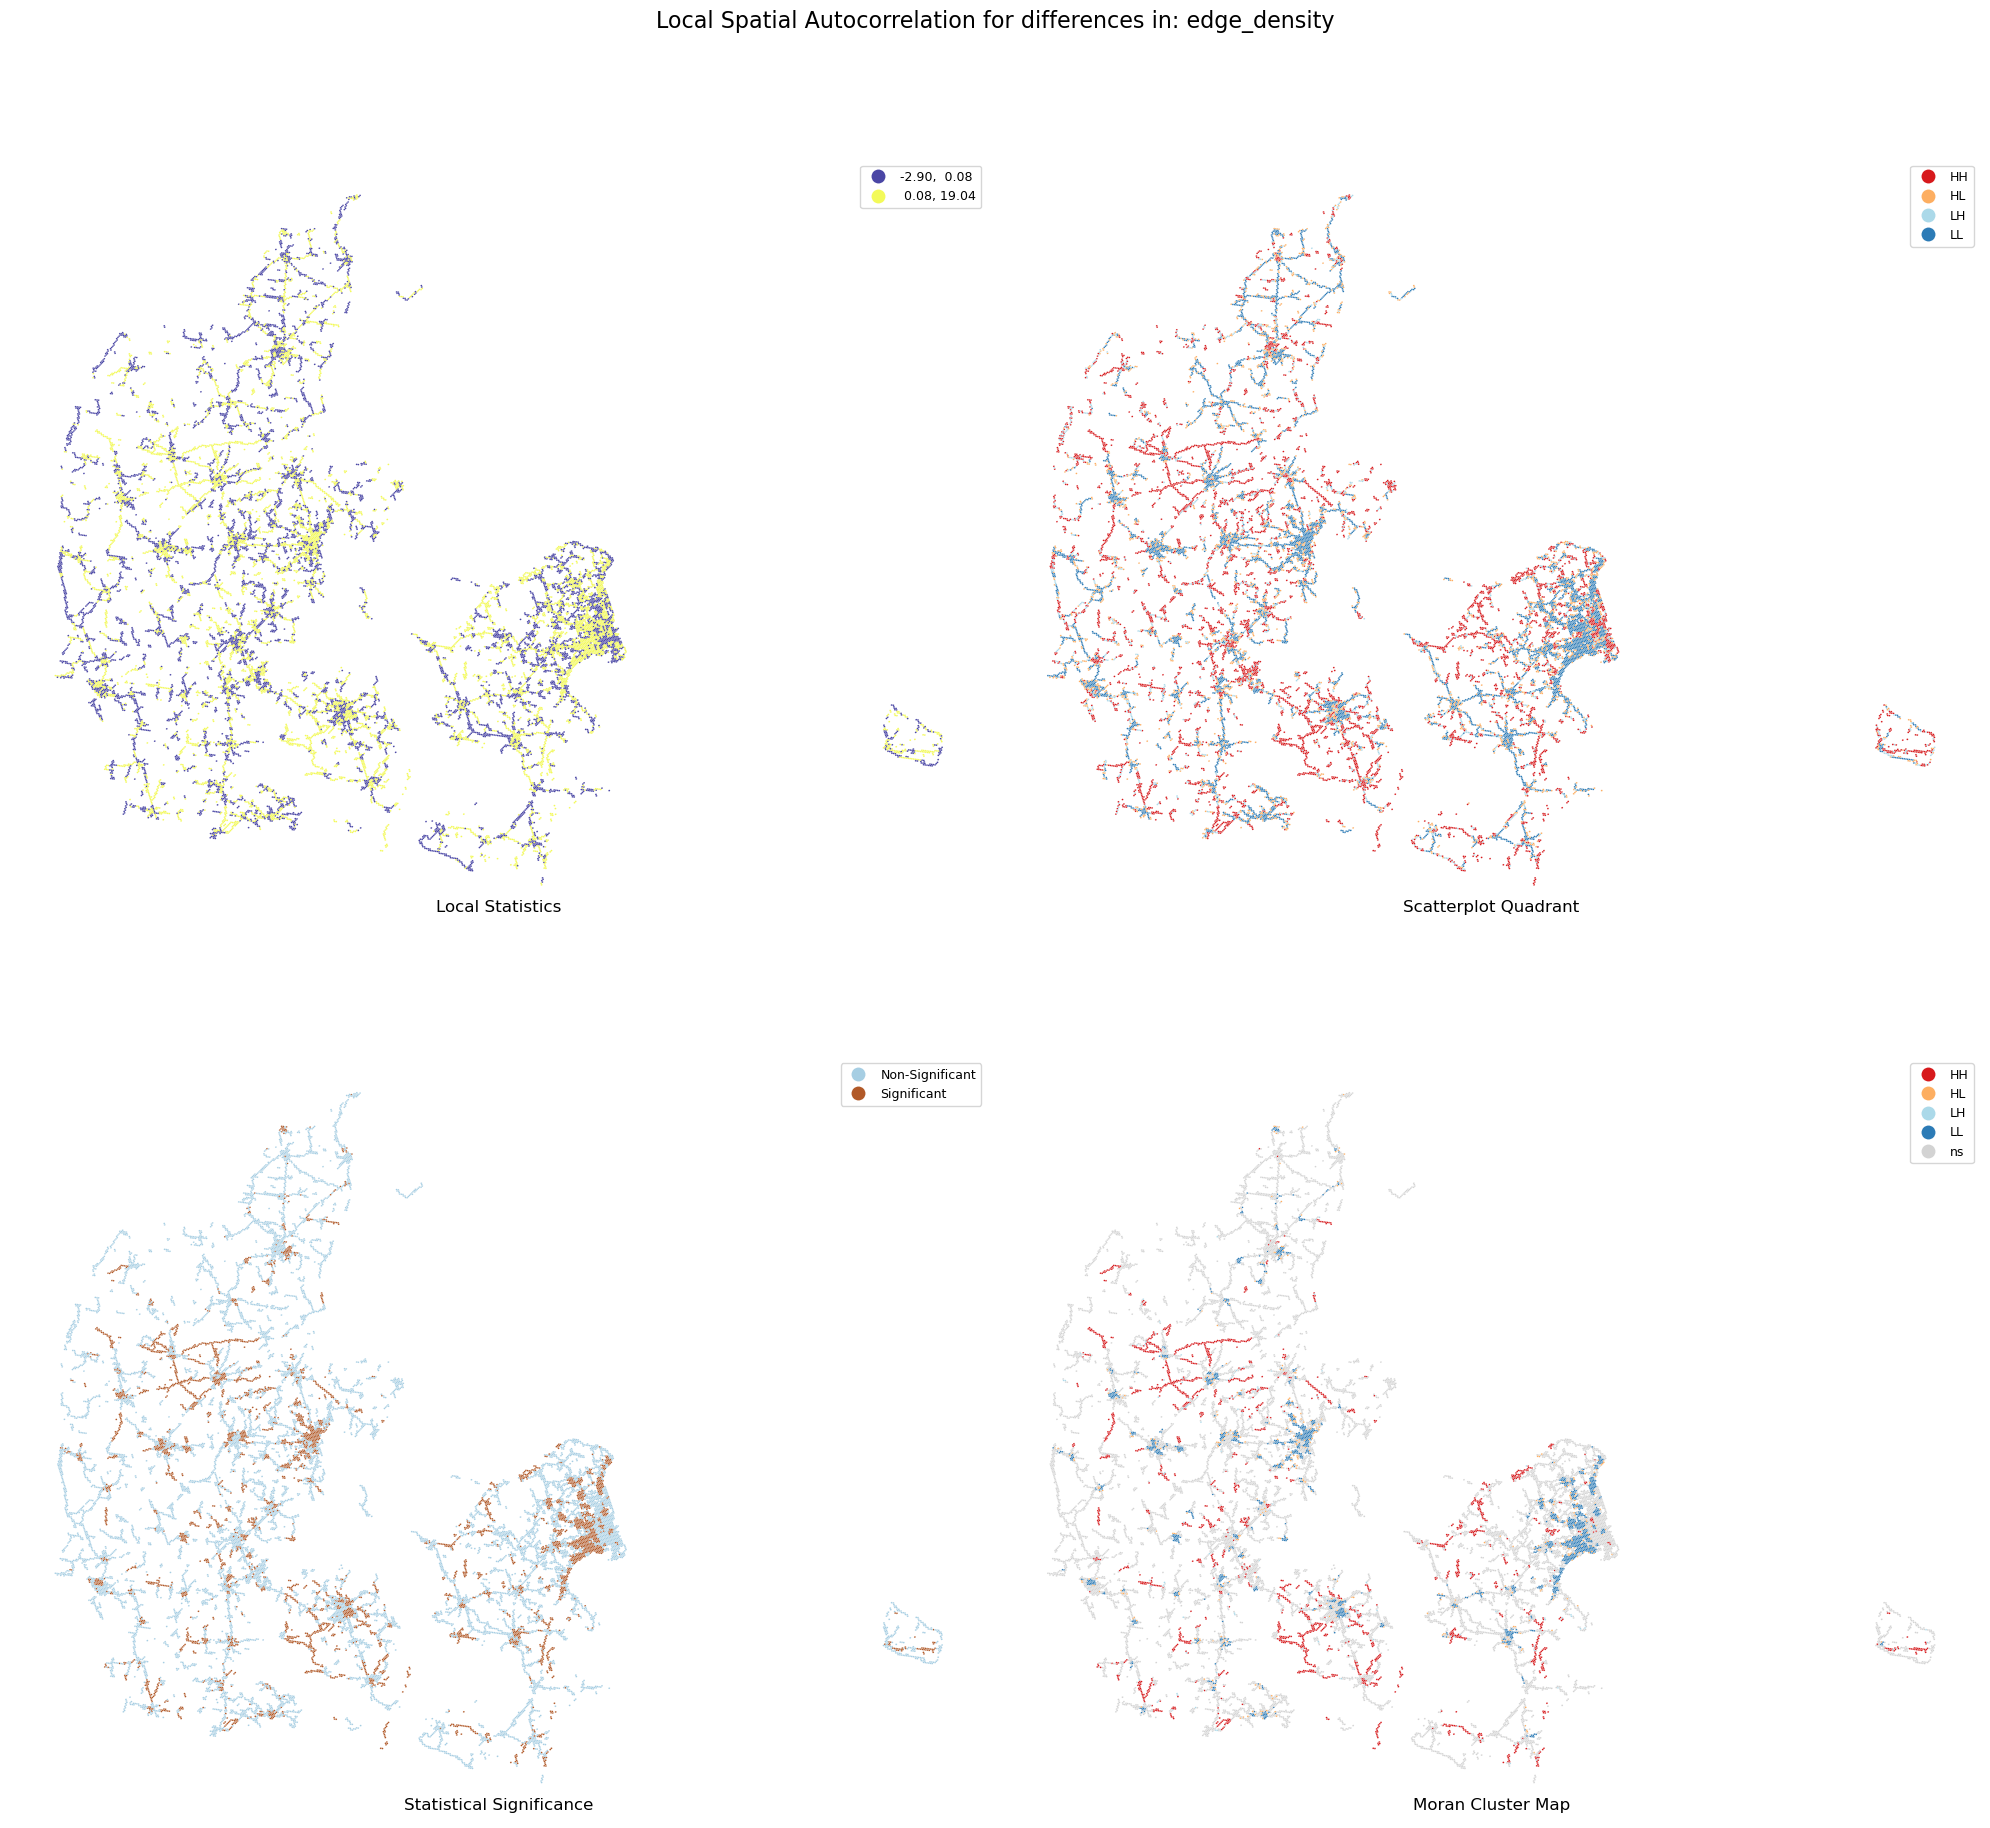

Using spatial weights k6, for 'edge_density', 1927 out of 16064 grid cells (12.00%) are part of a hotspot.
Using spatial weights k6, for 'edge_density', 1604 out of 16064 grid cells (9.99%) are part of a coldspot.




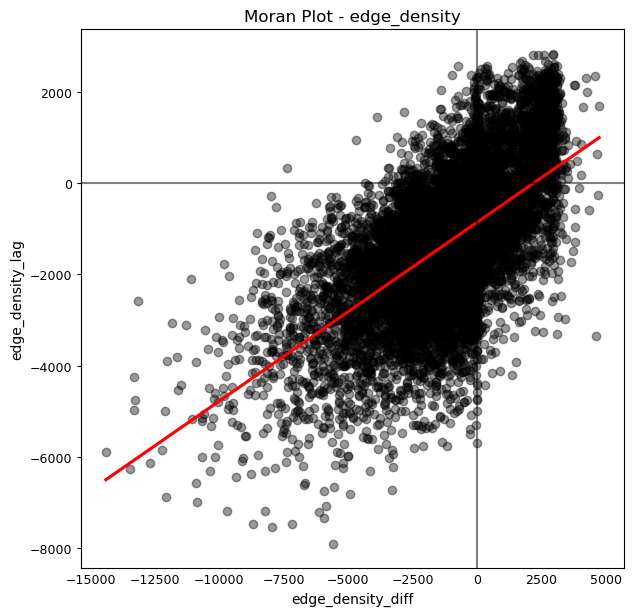

With significance 0.001, the Moran's I value for edge_density is 0.39


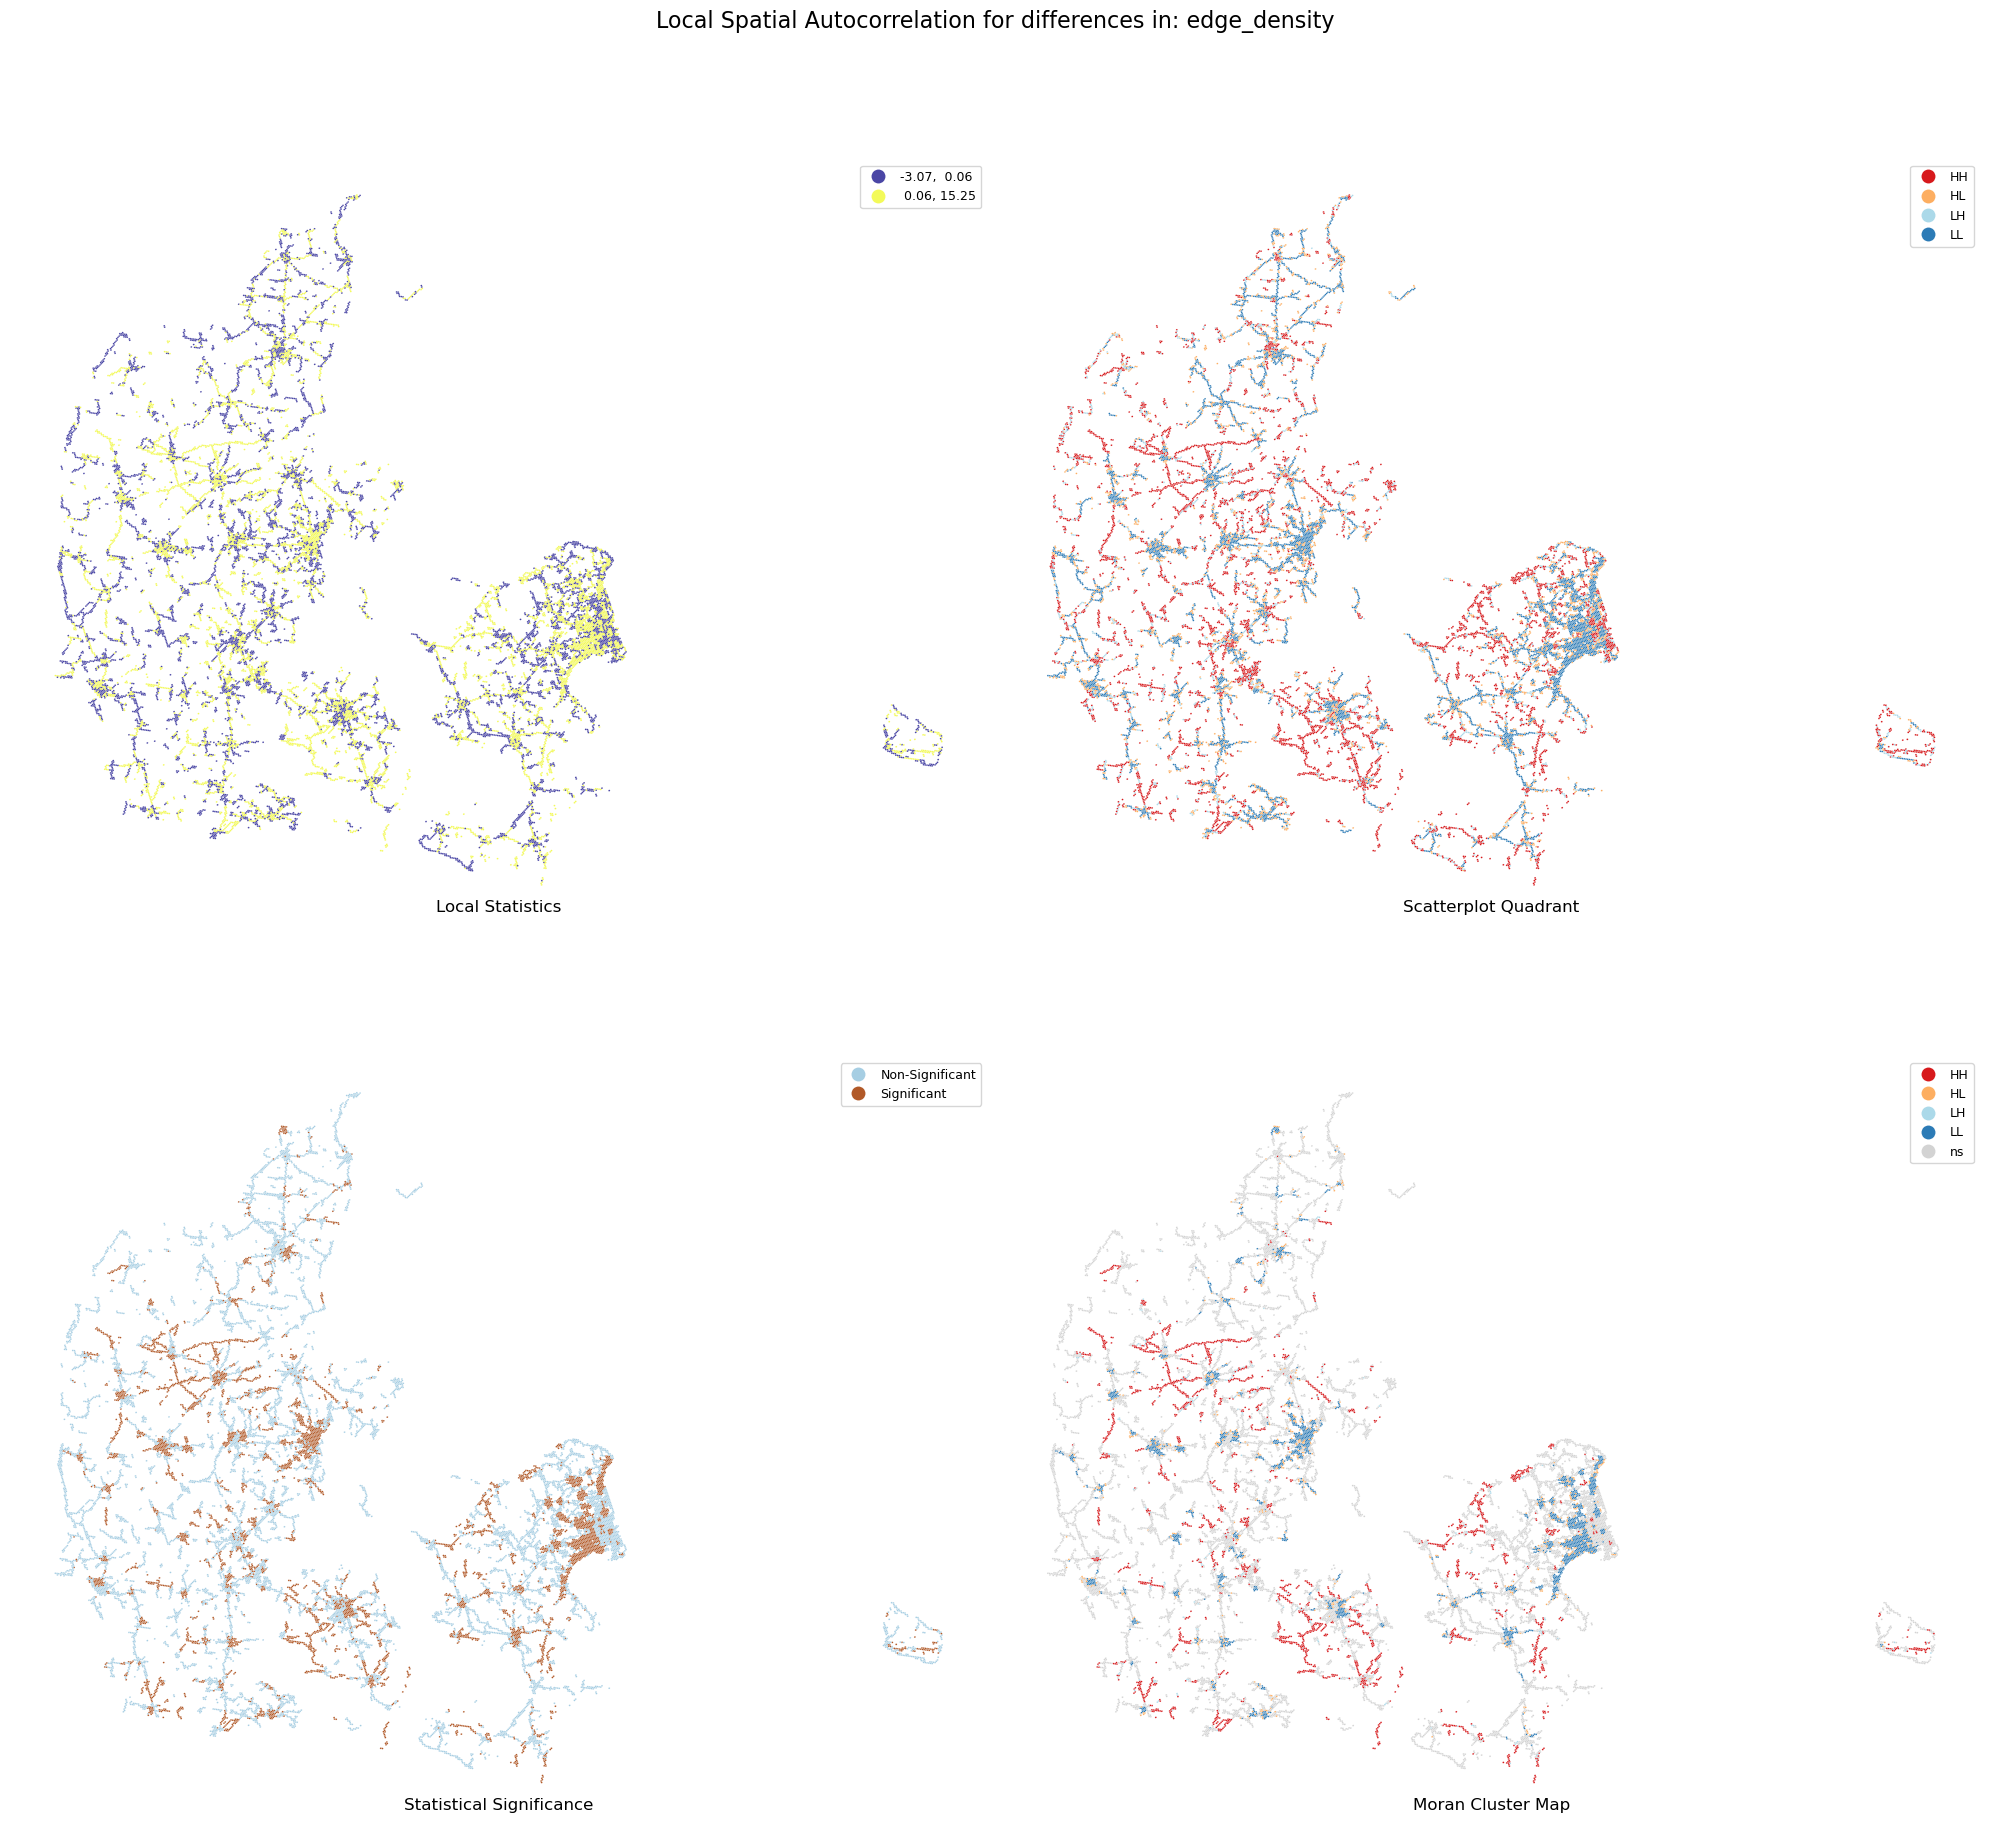

Using spatial weights k10, for 'edge_density', 2196 out of 16064 grid cells (13.67%) are part of a hotspot.
Using spatial weights k10, for 'edge_density', 1982 out of 16064 grid cells (12.34%) are part of a coldspot.




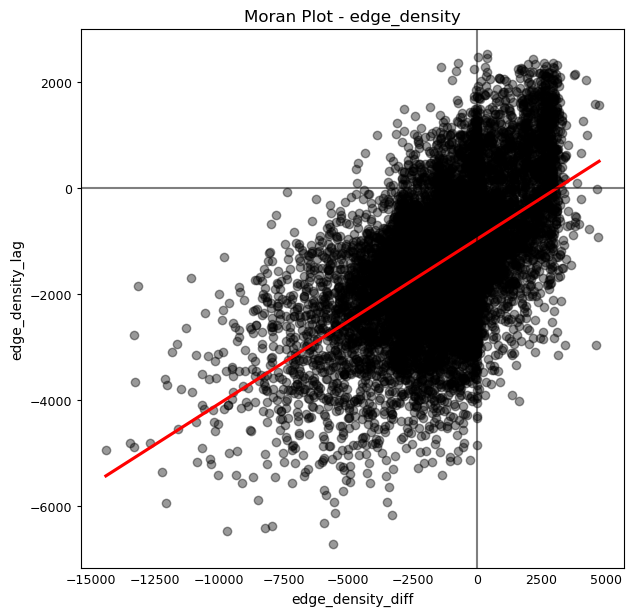

With significance 0.001, the Moran's I value for edge_density is 0.31


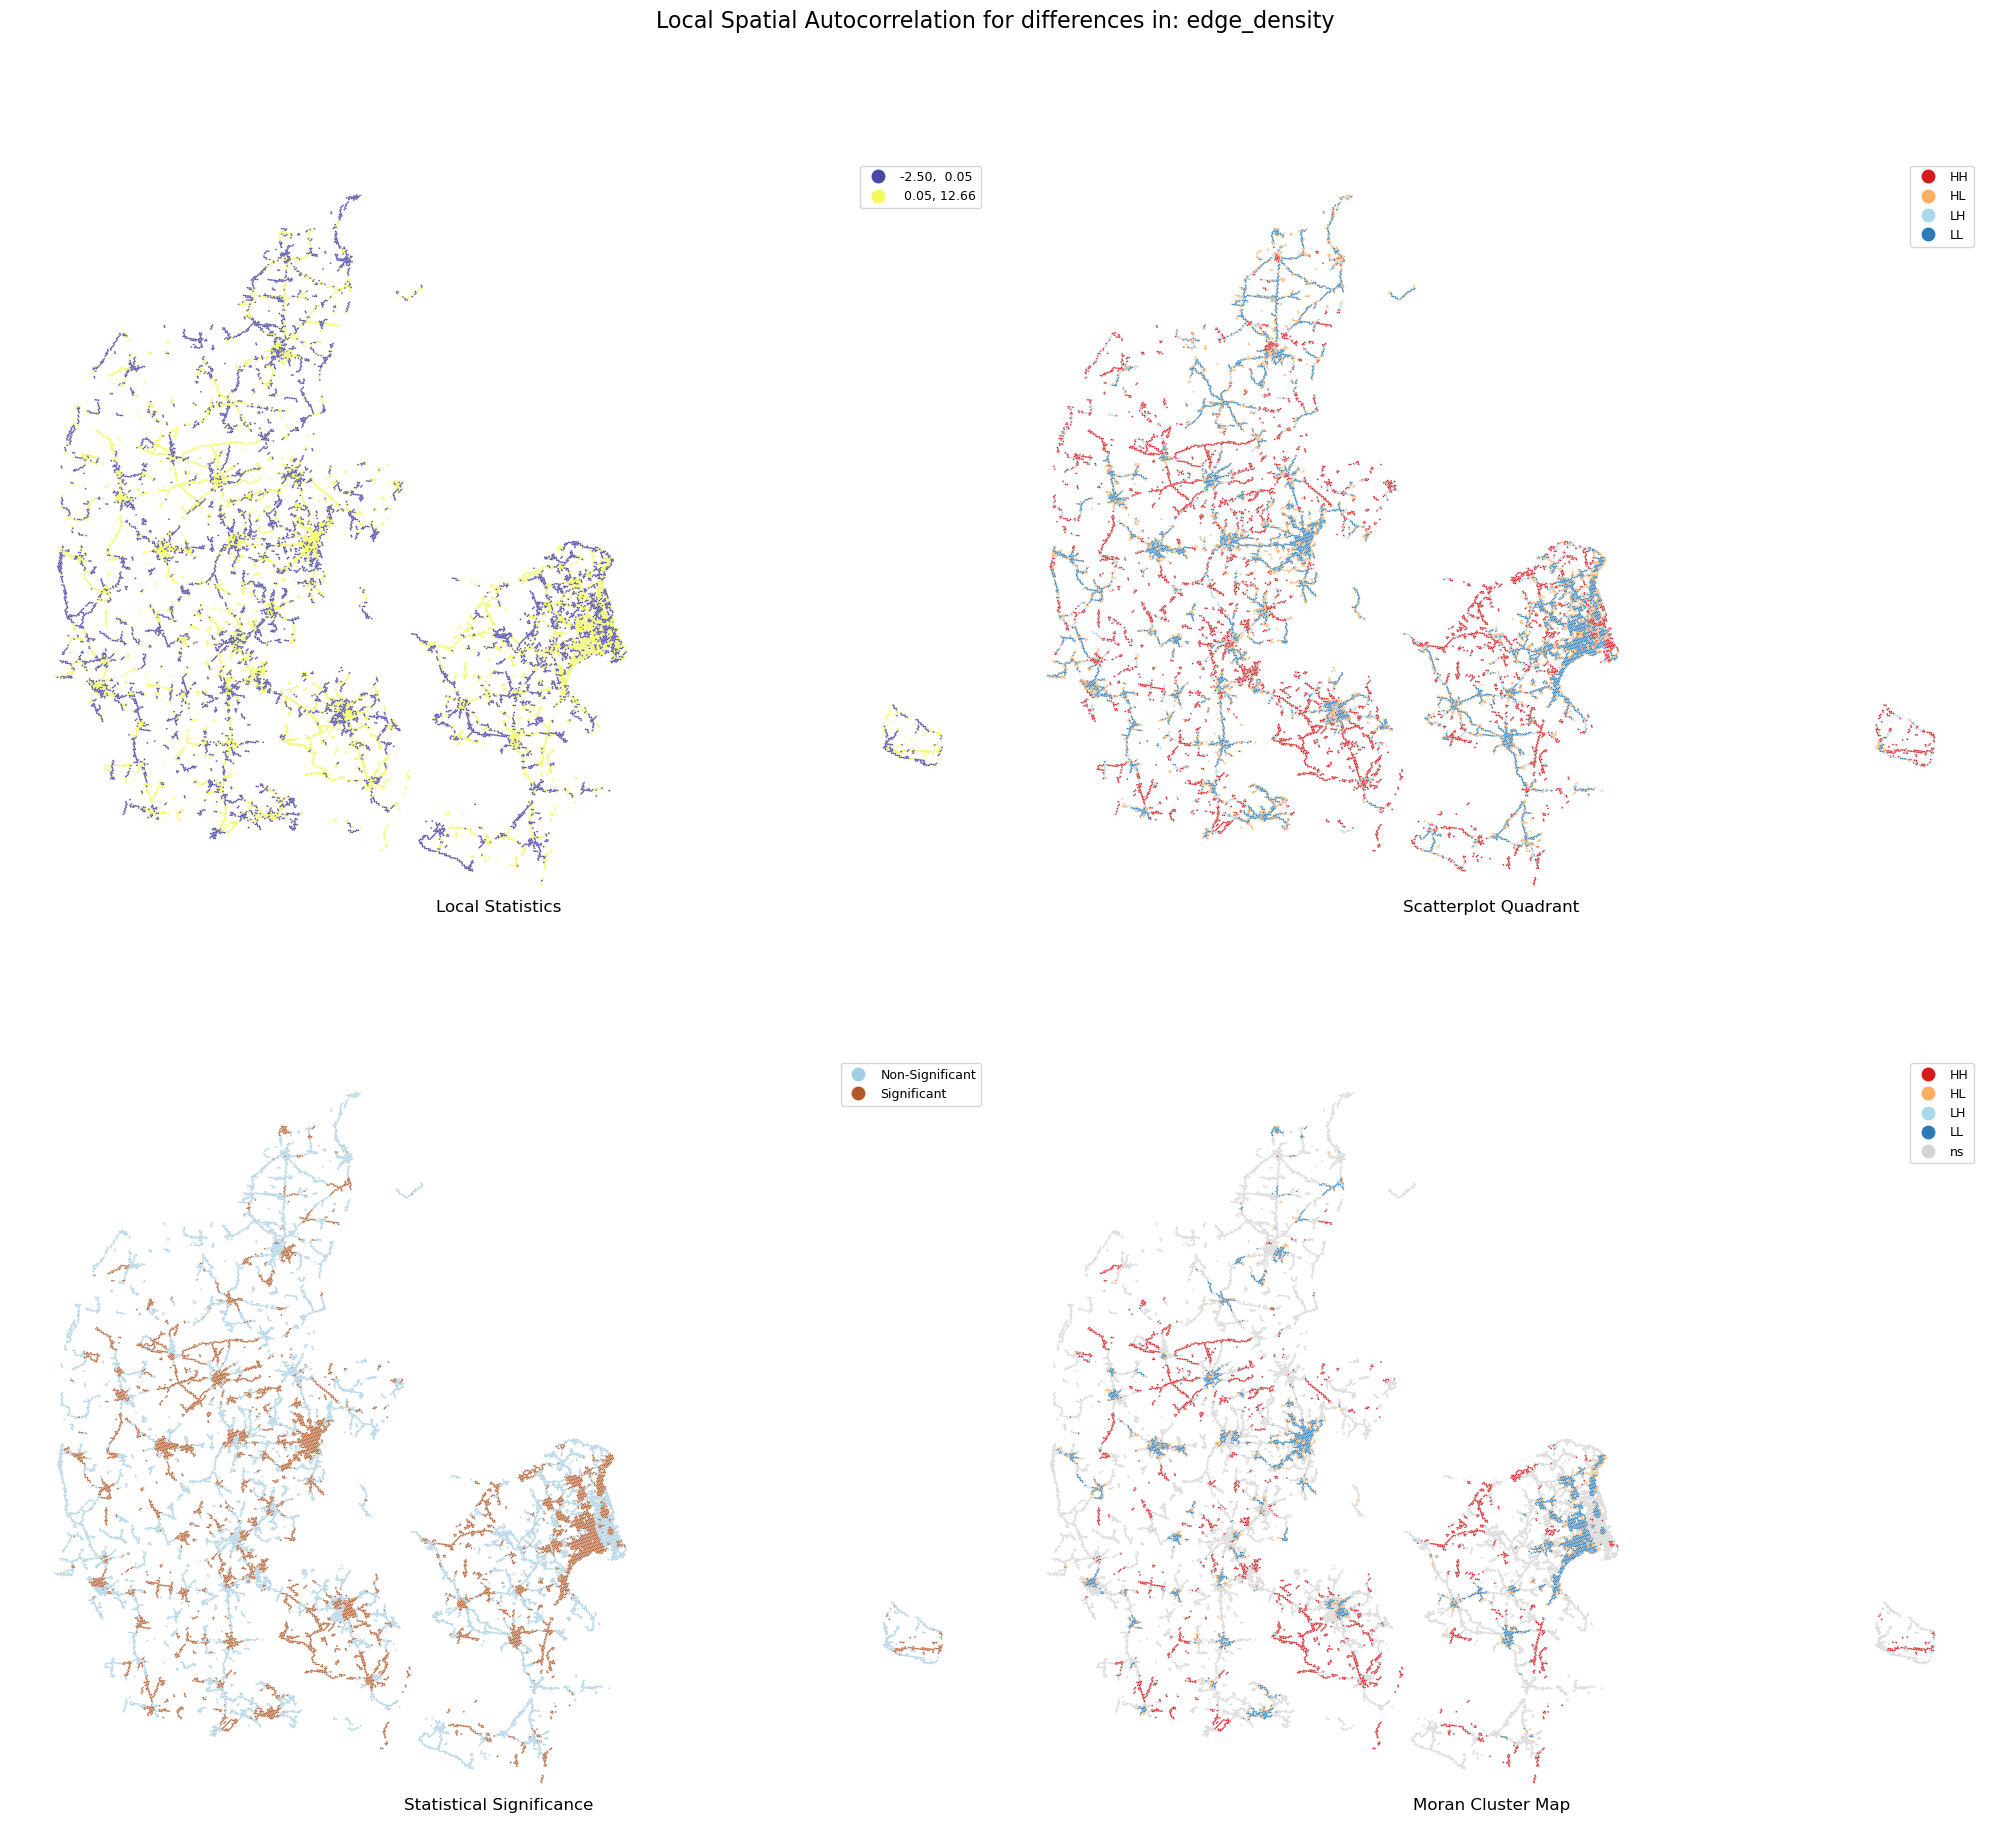

Using spatial weights k20, for 'edge_density', 2496 out of 16064 grid cells (15.54%) are part of a hotspot.
Using spatial weights k20, for 'edge_density', 2482 out of 16064 grid cells (15.45%) are part of a coldspot.




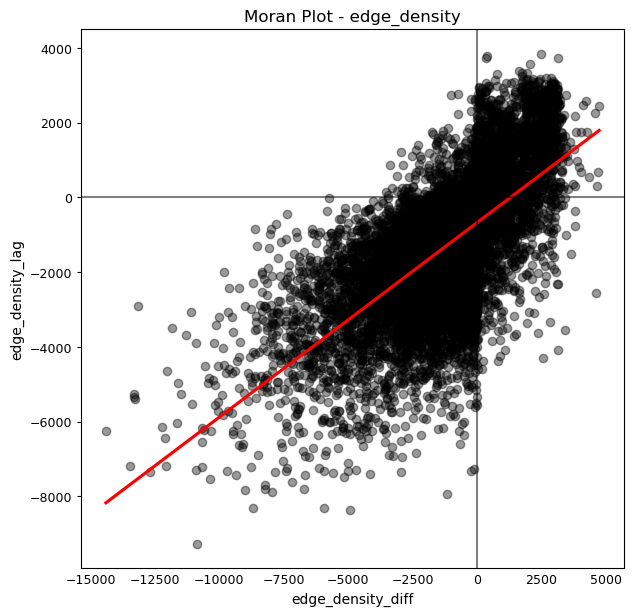

With significance 0.001, the Moran's I value for edge_density is 0.52


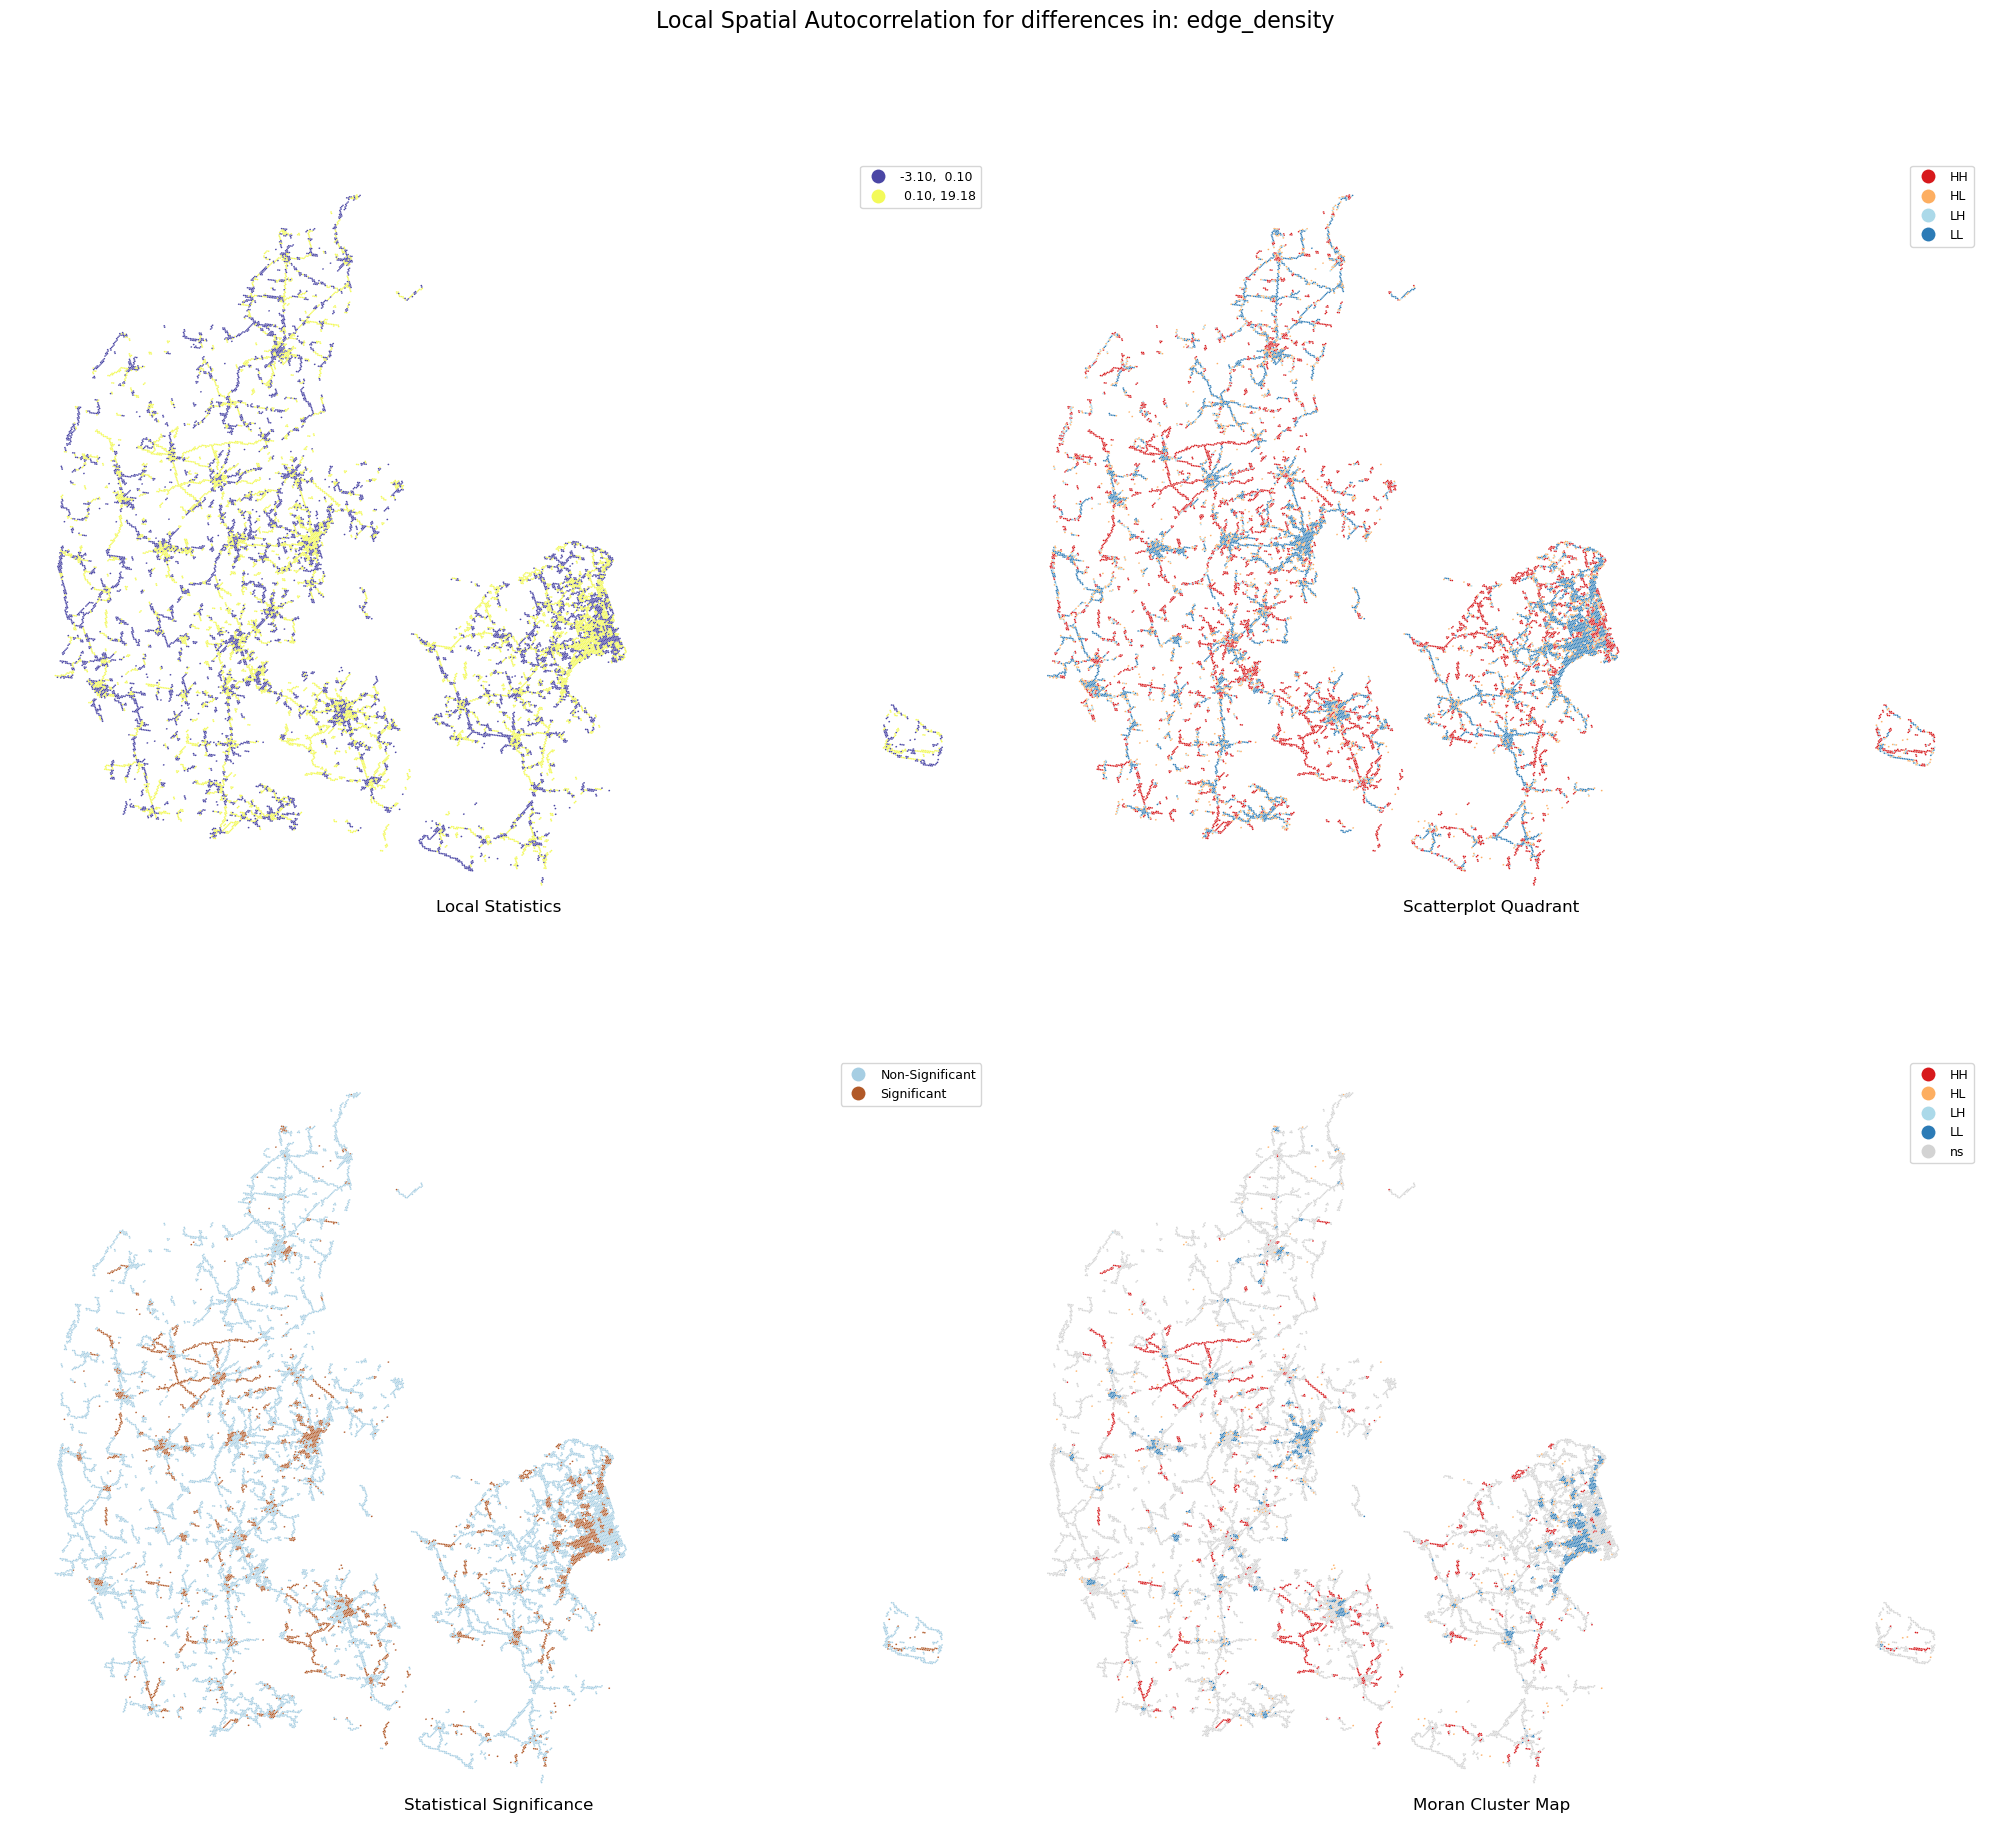

Using spatial weights dist1000, for 'edge_density', 1562 out of 16064 grid cells (9.72%) are part of a hotspot.
Using spatial weights dist1000, for 'edge_density', 1421 out of 16064 grid cells (8.85%) are part of a coldspot.




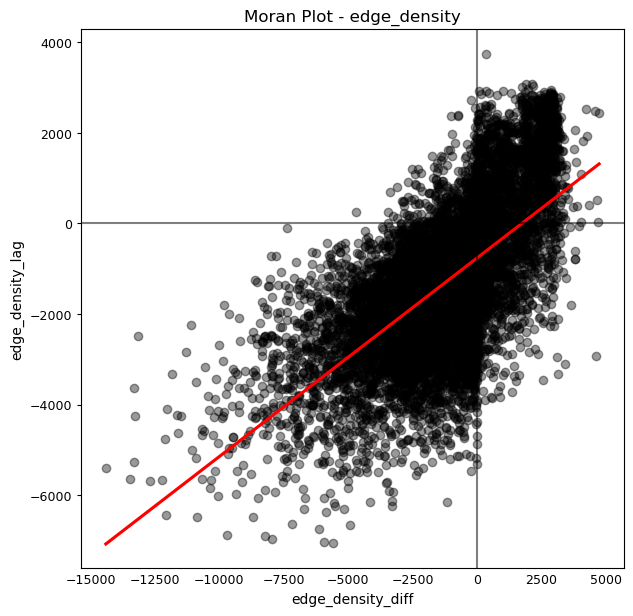

With significance 0.001, the Moran's I value for edge_density is 0.44


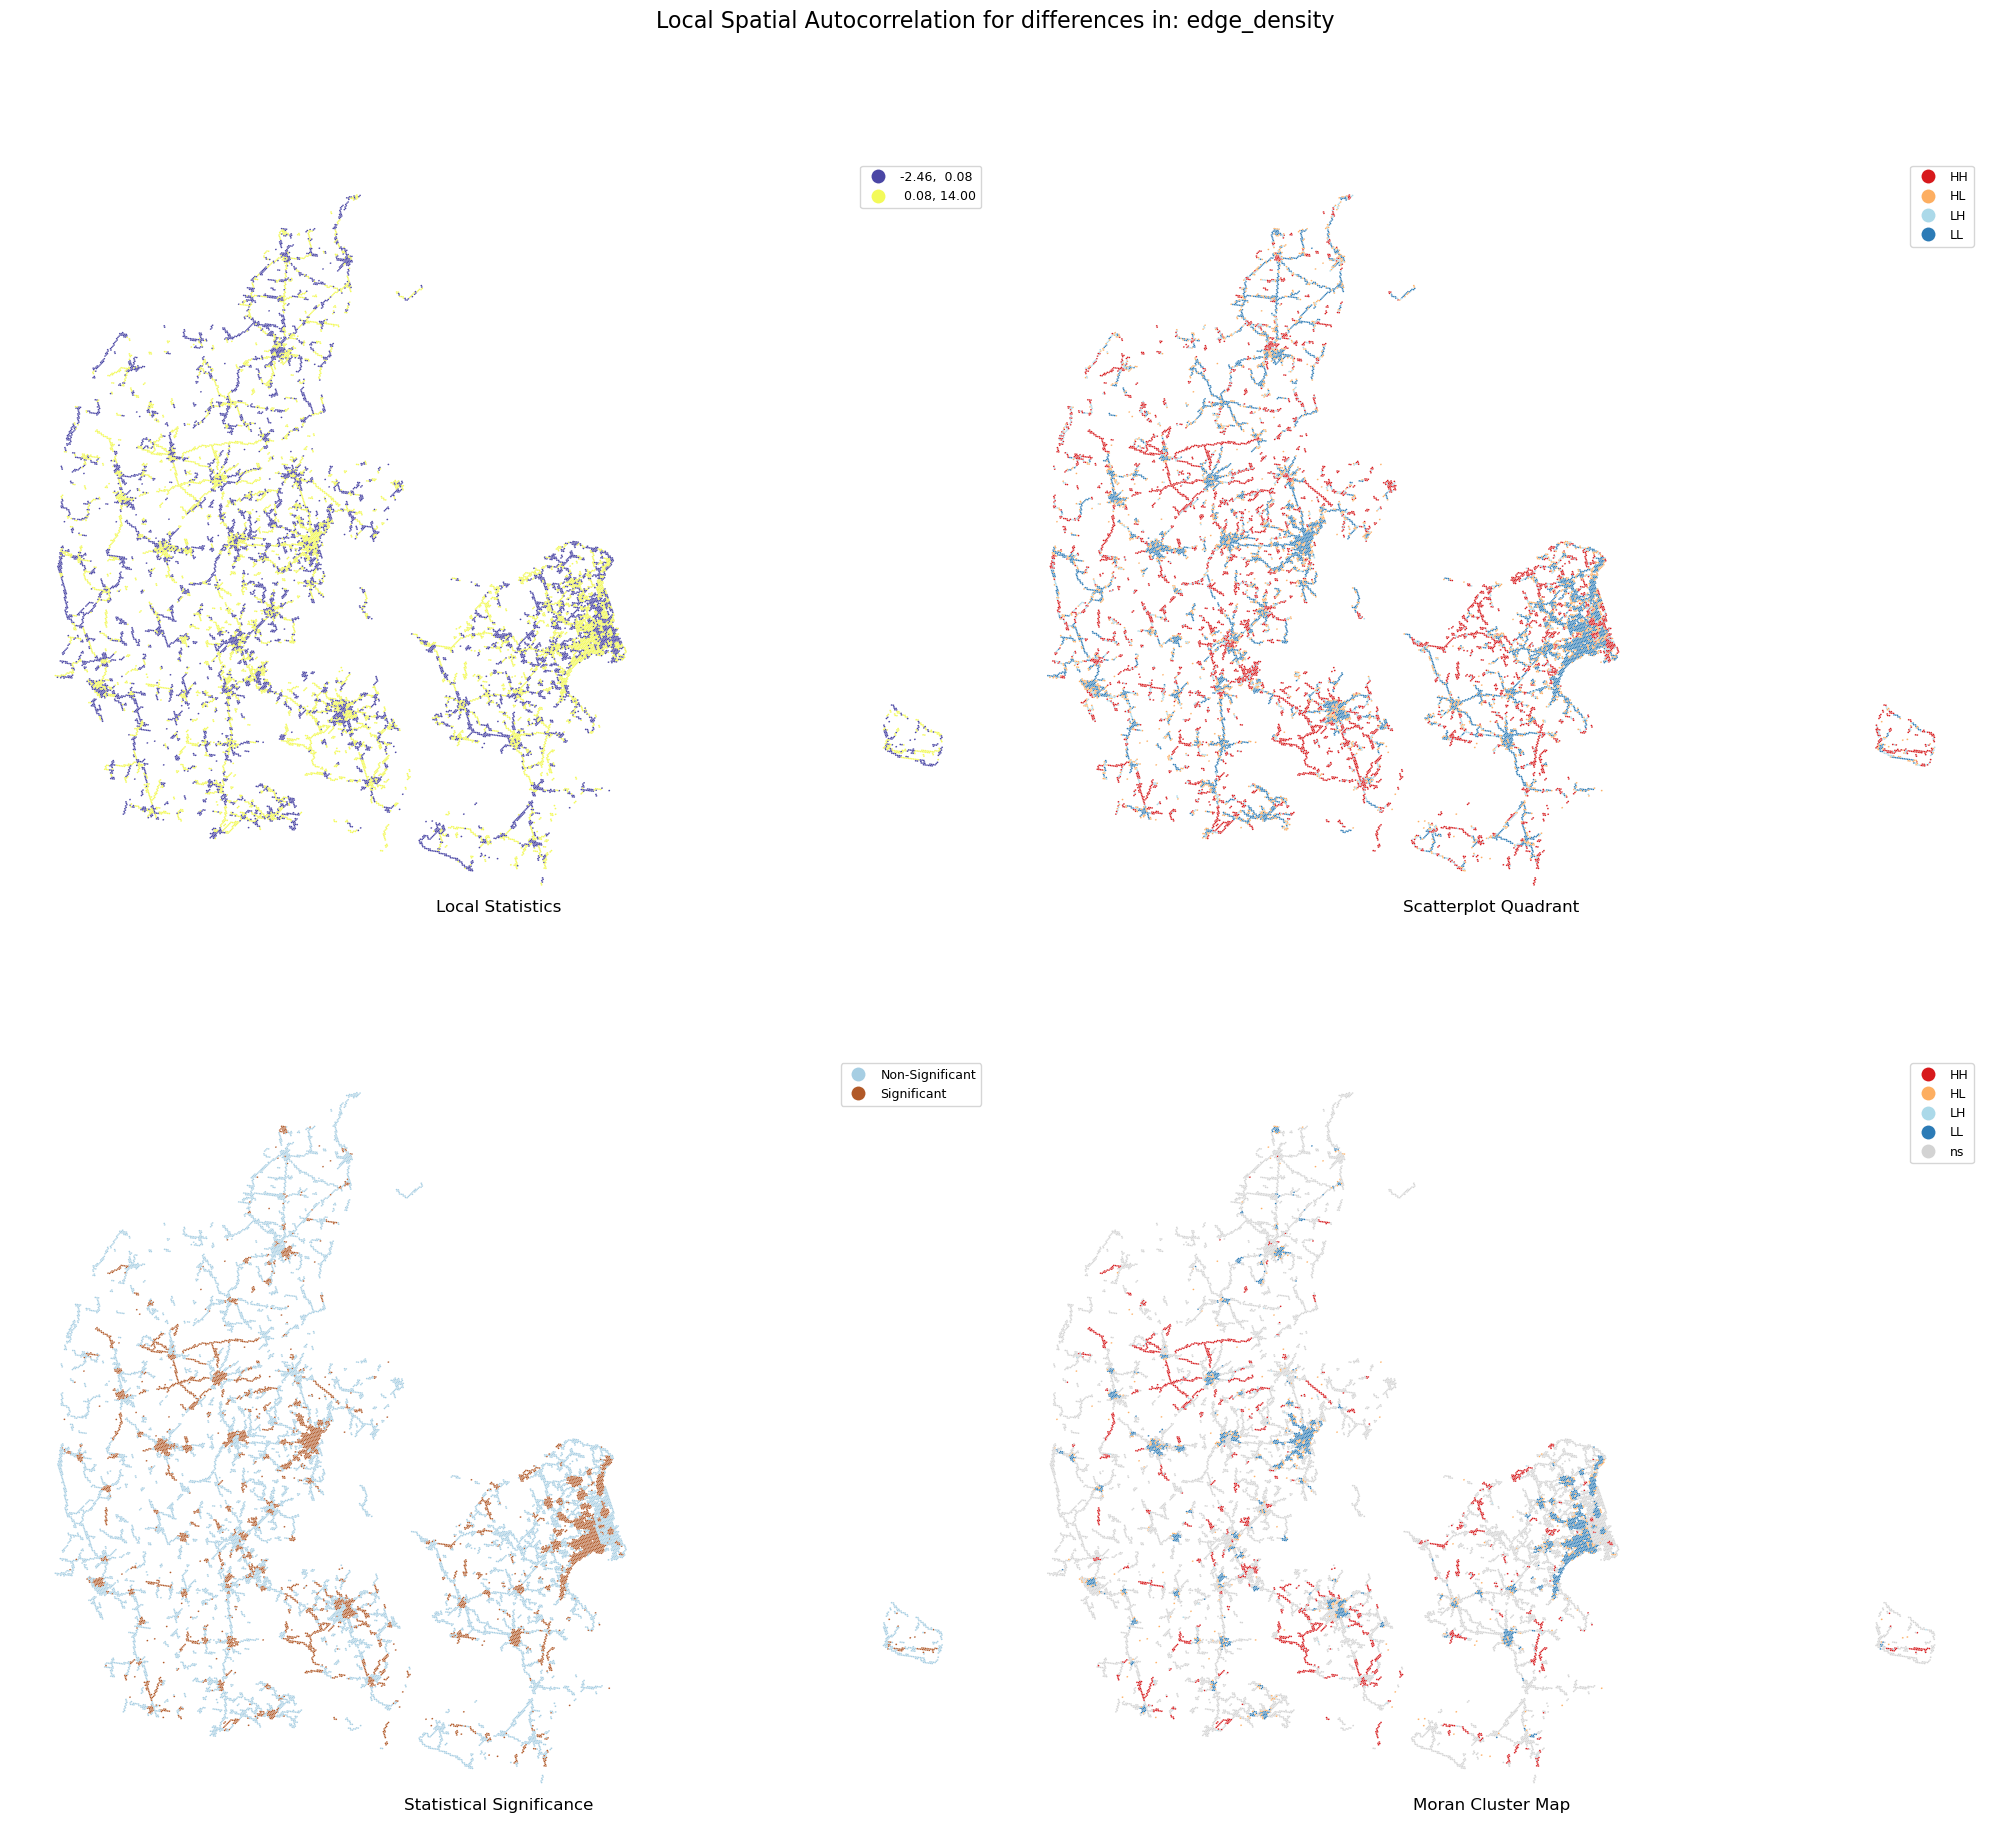

Using spatial weights dist2000, for 'edge_density', 1888 out of 16064 grid cells (11.75%) are part of a hotspot.
Using spatial weights dist2000, for 'edge_density', 1967 out of 16064 grid cells (12.24%) are part of a coldspot.




In [45]:
all_morans = {} 
all_lisas = {}
hotspot_count = {}
coldspot_count = {}

for name, w in all_weigths.items():
    
    morans_density = eval_func.compute_spatial_autocorrelation(col_names, variable_names, ex_grid_subset, w, filepaths)

    all_morans[name] = morans_density['edge_density'].I

    col_names = ['edge_density_diff']
    variable_names = ["edge_density"]
    filepaths = [compare_analysis_plots_fp+f"lisa_edge_dens_{name}.png"]

    lisas_density = eval_func.compute_lisa(col_names, variable_names, ex_grid_subset, w, filepaths)

    all_lisas[name] = lisas_density['edge_density']

    # Export
    q_cols = [v+'_q' for v in variable_names]
    q_cols.append("hex_id")
    ex_grid_subset.rename({"hex_id_osm":"hex_id"},axis=1)[q_cols].to_csv(compare_analysis_data_fp + f"density_spatial_autocorrelation_{name}.csv",index=True)

    for v in variable_names:
        hotspot = len(ex_grid_subset[ex_grid_subset[f"{v}_q"]=="HH"])
        coldspot = len(ex_grid_subset[ex_grid_subset[f"{v}_q"]=="LL"])

        print(f"Using spatial weights {name}, for '{v}', {hotspot} out of {len(ex_grid_subset)} grid cells ({hotspot/len(ex_grid_subset)*100:.2f}%) are part of a hotspot.")
        print(f"Using spatial weights {name}, for '{v}', {coldspot} out of {len(ex_grid_subset)} grid cells ({coldspot/len(ex_grid_subset)*100:.2f}%) are part of a coldspot.")
        print("\n")


        hotspot_count[name] = hotspot
        coldspot_count[name] = coldspot


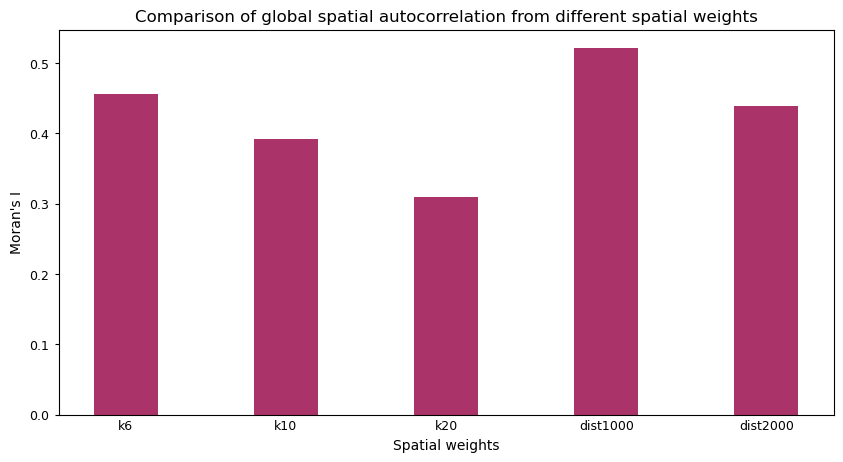

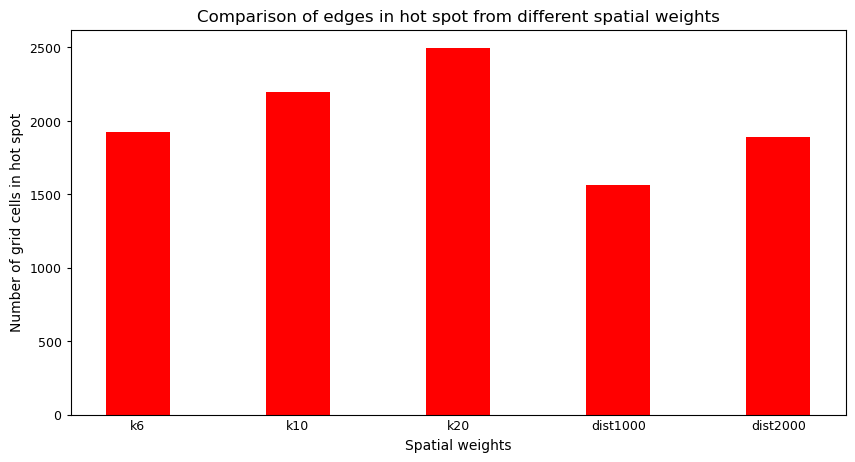

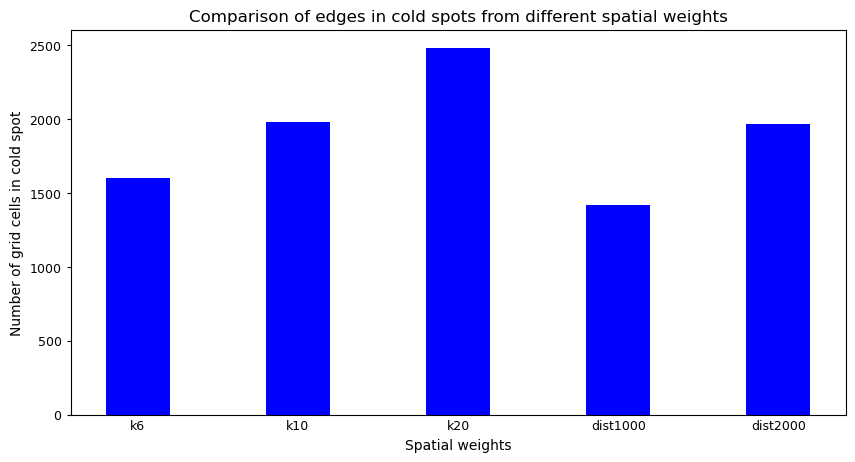

In [49]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(all_morans.keys(), all_morans.values(), color ="#AA336A",
        width = 0.4)
 
plt.xlabel("Spatial weights")
plt.ylabel("Moran's I")
plt.title("Comparison of global spatial autocorrelation from different spatial weights")
plt.show()


fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(hotspot_count.keys(), hotspot_count.values(), color ="red",
        width = 0.4)
 
plt.xlabel("Spatial weights")
plt.ylabel("Number of grid cells in hot spot")
plt.title("Comparison of edges in hot spot from different spatial weights")
plt.show()

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(coldspot_count.keys(), coldspot_count.values(), color ="blue",
        width = 0.4)
 
plt.xlabel("Spatial weights")
plt.ylabel("Number of grid cells in cold spot")
plt.title("Comparison of edges in cold spots from different spatial weights")
plt.show()

In [68]:
df_k6 = pd.read_csv(compare_analysis_data_fp + f"density_spatial_autocorrelation_k6.csv",usecols = ["edge_density_q","hex_id"])
df_k6['name'] = 'k6'

df_k10 = pd.read_csv(compare_analysis_data_fp + f"density_spatial_autocorrelation_k10.csv",usecols = ["edge_density_q","hex_id"])
df_k10['name'] = 'k10'

df_k20 = pd.read_csv(compare_analysis_data_fp + f"density_spatial_autocorrelation_k20.csv",usecols = ["edge_density_q","hex_id"])
df_k20['name'] = 'k20'

df_dist1 = pd.read_csv(compare_analysis_data_fp + f"density_spatial_autocorrelation_dist1000.csv",usecols = ["edge_density_q","hex_id"])
df_dist1['name'] = 'dist1000'

df_dist2 = pd.read_csv(compare_analysis_data_fp + f"density_spatial_autocorrelation_dist2000.csv",usecols = ["edge_density_q","hex_id"])
df_dist2['name'] = 'dist2000'

all_dfs = pd.concat([df_k6,df_k10, df_k20, df_dist1, df_dist2])

In [81]:
grouped = all_dfs.groupby('hex_id')

hex_classification_count = {}

for hex_id, group in grouped:

    hex_classification_count[hex_id] = len(group['edge_density_q'].unique())

count_reclassifications = [k for k,v in hex_classification_count.items() if v > 1]

print(f"{len(count_reclassifications)} out of {len(grouped)} grid cells change cluster type depending on the spatial weight")

5231 out of 16064 grid cells change cluster type depending on the spatial weight
